# Exercise 2: Decision Trees

In this assignment you will implement a Decision Tree algorithm as learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
2. Write vectorized code whenever possible.
3. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
4. Write your functions in the provided `hw2.py` python module only. All the logic you write is imported and used in this jupyter notebook.
5. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. Any other imports detected in `hw2.py` will earn you the grade of 0, even if you only used them for testing.
6. Your code must run without errors. During the environment setup, you were given a specific version of `numpy` to install. Changes of the configuration we provided are at your own risk. Code that cannot run will also earn you the grade of 0.
7. Write your own code. Cheating will not be tolerated. 
8. Submission includes the `hw2.py` file and this notebook. Answers to qualitative questions should be written in markdown cells (with $\LaTeX$ support).
9. You are allowed to include additional functions.
10. Submission: zip only the completed jupyter notebook and the python file `hw2.py`. Do not include the data or any directories. Name the file `ID1_ID2.zip` and submit only one copy of the assignment.

## In this exercise you will perform the following:
1. Practice OOP in python.
2. Implement two impurity measures: Gini and Entropy.
3. Implement a decision tree from scratch.
4. Prune the tree to achieve better results.
5. Visualize your results and the tree.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hw2 import * # this imports all functions from hw2.

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2

## Warmup - OOP in python

Our decision tree will be implemented using a dedicated python class. Python classes are very similar to classes in Java.


You can use the following [site](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/) to learn about classes in python.

In [2]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, node):
        self.children.append(node)

In [3]:
n = Node(5)
p = Node(6)
q = Node(7)
n.add_child(p)
n.add_child(q)
n.children

[<__main__.Node at 0x290f95e51d0>, <__main__.Node at 0x290f9d26a58>]

## Data preprocessing

We will use the breast cancer dataset that is available as a part of sklearn - a popular machine learning and data science library in python. In this example, our dataset will be a single matrix with the **labels on the last column**. Notice that you are not allowed to use additional functions from sklearn.

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# load dataset
X, y = datasets.load_breast_cancer(return_X_y = True)
X = np.column_stack([X,y]) # the last column holds the labels

# split dataset
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)

Training dataset shape:  (426, 31)
Testing dataset shape:  (143, 31)


## Impurity Measures

Implement the functions `calc_gini` (5 points) and `calc_entropy` (5 points) in the python file `hw2.py`. You are encouraged to test your implementation using the cell below.

In [5]:
##### Your code here #####
print (calc_gini(X_train))
print (calc_entropy(X_train))

# All of these should equal 0
print (calc_gini(X_train[X_train[:,-1]>0]))
print (calc_gini(X_train[X_train[:,-1]<1]))
print (calc_entropy(X_train[X_train[:,-1]>0]))
print (calc_entropy(X_train[X_train[:,-1]<1]))

0.47768299940488
0.9675594819018212
0.0
0.0
0.0
0.0


## Building a Decision Tree

Use a Python class to construct the decision tree (look at the `DecisionNode` class in the python file `hw2.py`. Your class should support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes and you are free to use them as you see fit. We recommend that every node will hold the feature and value used for the split and its children.
2. Your code should support both Gini and Entropy as impurity measures. 
3. The provided data includes continuous data. In this exercise, create at most a single split for each node of the tree. The threshold you need to use for this exercise are the average of each consecutive pair of values. For example, assume some features contains the following values: [1,2,3,4,5]. You should use the following thresholds [1.5, 2.5, 3.5, 4.5]. 
4. When constructing the tree, test all possible thresholds for each feature. The stopping criteria is a pure tree.

Complete the class `DecisionNode` in the python file `hw2.py`. The structure of this class is entirely up to you. Complete the function `build_tree` in the python file `hw2.py`. This function should get the training dataset and the impurity as inputs, initiate a root for the decision tree and construct the tree according to the procedure you learned in class. (30 points).

In [6]:
# python support passing a function as arguments to another function.
tree_gini = build_tree(data=X_train, impurity=calc_gini) 
tree_entropy = build_tree(data=X_train, impurity=calc_entropy)

## Tree evaluation

Complete the functions `predict` and `calc_accuracy` in the python file `hw2.py`. You are allowed to implement this functionality as a class method.

After building both trees using the training set (using Gini and Entropy as impurity measures), you should calculate the accuracy on the test set and print the measure that gave you the best test accuracy. For the rest of the exercise, use that impurity measure. (10 points)

In [7]:
#### Your code here ####
gini = calc_accuracy(tree_gini, X_test)
entropy = calc_accuracy(tree_entropy, X_test)
best_func = calc_gini if gini > entropy else calc_entropy
best_tree = tree_gini if gini > entropy else tree_entropy
print ('The best measure is', 'calc_gini.' if gini > entropy else 'calc_entropy.', 'accuracy:', max(gini, entropy))

The best measure is calc_entropy. accuracy: 0.9370629370629371


## Chi square pre-pruning

Consider the following p-value cut-off values: [1 (no pruning), 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00001]. For each value, construct a tree and prune it according to the cut-off value. Next, calculate the training and testing accuracy. On a single plot, draw the training and testing accuracy as a function of the p-value. What p-value gives you the best results? Does the results support the theory you learned in class regarding Chi square pruning? Explain. (20 points)

**Note**: You need to change the `DecisionNode` to support Chi square pruning. Make sure the `chi_value=1` corresponds to no pruning. The values you need from the Chi square table are available in the python file `hw2.py`.

In [10]:
training = []
testing  = []
p_values = [1, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00001]
#### Your code here ####
for chi_value in p_values:
    tree = build_tree(X_train, best_func, chi_value)
    train_accuracy = calc_accuracy(tree, X_train)
    test_accuracy = calc_accuracy(tree, X_test)
    training.append(train_accuracy)
    testing.append(test_accuracy)
    print (train_accuracy)

1.0
0.9976525821596244
0.9976525821596244
0.9953051643192489
0.9953051643192489
0.9882629107981221
0.9859154929577465


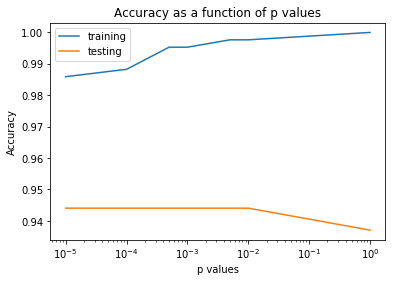

In [11]:
#### Your visualization here ####
plt.plot(p_values, training)
plt.plot(p_values, testing)
plt.xscale('log')
plt.yscale('linear')
plt.ylabel('Accuracy')
plt.xlabel('p values')
plt.title('Accuracy as a function of p values')
plt.legend(['training', 'testing'])
plt.show()

The p value that gives us the best result, are actually all p values smaller or equal to 0.001. The results partially support the theory learnt in class. I assume that a stricter p value (which leads to more earlier prunings) would show us a decrease in testing accuracy. However, it seems that even though the p values smaller than 0.001 pruned more nodes, the testing accuracy remained the same. Moreover, pruning even the slightest (changing the p value from 1 to 0.01 for instance), gave us an increase in accuracy on the testing test. I can conclude that pre-pruning is worthwhile in order to avoid overfitting, however, one should check a range of values in order to find the optimal p value.

## Post pruning

Construct a decision tree without Chi square pruning. For each leaf in the tree, calculate the test accuracy of the tree assuming no split occurred on the parent of that leaf and find the best such parent (in the sense that not splitting on that parent results in the best testing accuracy among possible parents). Make that parent into a leaf and repeat this process until you are left with just the root. On a single plot, draw the training and testing accuracy as a function of the number of internal nodes in the tree. Explain the results: what would happen to the training and testing accuracies when you remove nodes from the tree? Can you suggest a different approach to achieve better results? (20 points)

In [12]:
#### Your code here ####

def get_leaves(root):
    count = 0
    queue = [root]
    leaves = []
    while queue:
        count += 1
        node = queue.pop()
        if not node.has_children():
            leaves.append(node)
        else:
            for child in node.children:
                    queue.append(child)
    return leaves, count

root = build_tree(X_train, best_func)



In [13]:

leaves, count = get_leaves(root)
post_training = [calc_accuracy(root, X_train)]
post_testing = [calc_accuracy(root, X_test)]
post_n_of_nodes = [count]

while root.has_children():
    best_parent = None
    best_train_accuracy = 0
    best_test_accuracy = 0
    set_of_parents = set([leaf.parent for leaf in leaves if leaf.parent])
    if not set_of_parents:
        break
    for parent in set_of_parents:
        temp_children = parent.children[:]
        parent.children = []
        train = calc_accuracy(root, X_train)
        test = calc_accuracy(root, X_test)
        if train > best_train_accuracy:
            best_parent = parent
            best_train_accuracy = train
            best_test_accuracy = test
        parent.children = temp_children
    for child in best_parent.children:
        if child in leaves:
            leaves.remove(child)
            count -= 1
    leaves.append(best_parent)
    post_training.append(best_train_accuracy)
    post_testing.append(best_test_accuracy)
    post_n_of_nodes.append(count)


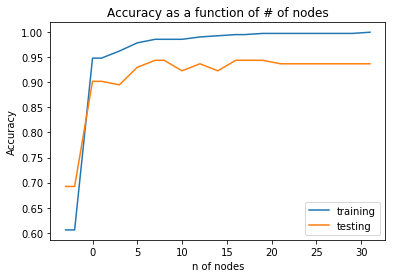

In [14]:
plt.plot(post_n_of_nodes, post_training)
plt.plot(post_n_of_nodes, post_testing)
plt.xscale('linear')
plt.yscale('linear')
plt.ylabel('Accuracy')
plt.xlabel('n of nodes')
plt.title('Accuracy as a function of # of nodes')
plt.legend(['training', 'testing'])
plt.show()

As one can expect, the accuracy steeply decreases once the tree's depth is lower than 3. The testing data accuracy behaves exactly as expected, and while not consistent, you obviously see the same pattern in the testing data's accuracy.
Perhaps, in order to find the best number of nodes , we could instead of eliminating leaves each time, instead get rid of whole levels each time. Or alternatively, mark some features as non factors when building the tree, as we did in hw1, and find the best X-et (triplet, quadruplet, etc) that fits the data, (max. of avg. of training + testing accuracy)

## Print the tree

Complete the function `print_tree` in the python file `hw2.py` and print the tree using the chosen impurity measure and no pruning. Your code should like something like this (10 points):
```
[X0 <= 1],
  [X1 <= 2]
    [X2 <= 3], 
       leaf: [{1.0: 10}]
       leaf: [{0.0: 10}]
    [X4 <= 5], 
       leaf: [{1.0: 5}]
       leaf: [{0.0: 10}]
   leaf: [{1.0: 50}]
```


In [16]:
#### Your code here ####
print_tree(best_tree)

[X27 <= 0.14235]
  [X3 <= 696.25]
    [X27 <= 0.1349]
      [X10 <= 0.62555]
        [X21 <= 33.349999999999994]
          leaf: [1.0: 216]
          [X21 <= 33.56]
            leaf: [0.0: 1]
            leaf: [1.0: 17]
        [X1 <= 18.630000000000003]
          leaf: [0.0: 1]
          leaf: [1.0: 2]
      [X15 <= 0.02744]
        [X0 <= 13.225000000000001]
          leaf: [1.0: 1]
          leaf: [0.0: 4]
        leaf: [1.0: 6]
    [X1 <= 19.72]
      [X6 <= 0.073105]
        leaf: [1.0: 7]
        leaf: [0.0: 3]
      leaf: [0.0: 13]
  [X13 <= 21.924999999999997]
    [X21 <= 29.0]
      [X1 <= 20.52]
        leaf: [1.0: 8]
        leaf: [0.0: 1]
      leaf: [0.0: 5]
    [X4 <= 0.079285]
      leaf: [1.0: 1]
      leaf: [0.0: 140]
